In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dash
import jupyter_dash as jd
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input, State
from dash.exceptions import PreventUpdate
from dash_table import DataTable
import pandas as pd
pd.options.display.max_columns = None

for p in [plotly, dash, jd, dcc, html, dbc, pd,]:
    print(f'{p.__name__:-<30}v{p.__version__}')

plotly------------------------v4.14.3
dash--------------------------v1.19.0
jupyter_dash------------------v0.4.0
dash_core_components----------v1.15.0
dash_html_components----------v1.1.2
dash_bootstrap_components-----v0.11.3
pandas------------------------v1.2.3


In [52]:
df = pd.read_csv('data/2019.csv')
df['num_chars'] = df['full_text'].str.len()
df['num_words'] = df['full_text'].str.split().str.len()


df2 = pd.read_csv('data/tweets.csv')
df2['weekday'] = pd.to_datetime(df2['date']).dt.weekday
df2['year'] = pd.to_datetime(df2['date']).dt.year
df2['month'] = pd.to_datetime(df2['date']).dt.month


df3 = df2['year'].value_counts().sort_index().to_frame().reset_index()
fig = px.pie(df3,values='year',names='index')
# Top words by freq

# word_tweet_freq=[]
# for tweet in df['full_text']:
#     for words in tweet.split():
#         word_tweet_freq.append(words)
# word_fre = FreqDist(word_tweet_freq)

# create a Df with th efrequency of each word
#df_words = pd.DataFrame.from_dict(dict_to_df)

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1('Exploratory Data Analisis - EDA'),
    html.Br(),
    html.H2("Data understanding I"),
    html.Br(),
    dbc.Label('EDA I'),
    html.Br(),
    dbc.Label('Modify number of bins:'),
            dcc.Slider(id='hist_bins_slider', 
                       dots=True, min=0, max=100, step=5, included=False,
                       marks={x: str(x) for x in range(0, 105, 5)}),
    html.Br(),
    dbc.Row([
        
        dbc.Col([
            dbc.Label('Histogram - Character tweets distribution by length.'),
            dcc.Graph(id='chars_freq_hist')
        ]),
        dbc.Col([
            dbc.Label('Histogram - Words tweets distribution by length.'),
            dcc.Graph(id='words_freq_hist')
        ]),
    ]),
    
    
    html.Br(),
    html.H2('Data understanding II'),
    html.Br(),
    dbc.Label('Bar chart - Tweets frequency by weekday.'),
    dcc.Dropdown(id='year_weekday_dropdown',
                 options=[{'label': year, 'value': year} for year in df2['year'].drop_duplicates().sort_values()]),
    dcc.Graph(id='bar_freq_weekday'),
    
    html.Br(),
    dbc.Label('Pie chart - Tweets distribution by year.'),
    dcc.Graph(figure=fig)
    
    
    
    ])

@app.callback(Output('chars_freq_hist', 'figure'),
              Output('words_freq_hist', 'figure'),
              Input('hist_bins_slider', 'value'))

def plot_freq_hist(nbins):
    fig1 = px.histogram(df,
                        x='num_chars',
                        nbins=nbins,
                        color_discrete_sequence=['#5BC0BE'])
                        #marginal="rug")
    
    fig2 = px.histogram(df,
                        x='num_words',
                        nbins=nbins,
                        color_discrete_sequence=['#5BC0BE'])
                        #marginal="rug")
    return fig1, fig2

@app.callback(Output('bar_freq_weekday', 'figure'),
              Input('year_weekday_dropdown', 'value'))
def plot_tweets_freq_weekday(year):
    df = df2[df2['year'].eq(year)]
    df = df['weekday'].value_counts().sort_index().to_frame().reset_index()
    
    fig = px.bar(df,
                 x='index',
                 y='weekday')
    return fig




app.run_server(debug=True, port=8042)

Dash app running on http://127.0.0.1:8041/


In [34]:
df = pd.read_csv('data/2019.csv')
df['num_chars'] = df['full_text'].str.len()
df['num_words'] = df['full_text'].str.split().str.len()


df2 = pd.read_csv('data/tweets.csv')
df2['weekday'] = pd.to_datetime(df2['date']).dt.weekday
df2['year'] = pd.to_datetime(df2['date']).dt.year
df2['month'] = pd.to_datetime(df2['date']).dt.month
df3 = df2[df2['year'].eq(2019)].groupby('weekday').value_counts()
df3.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [46]:
df2['year'].value_counts().sort_index().to_frame().reset_index()

,index,year
0,2019,94325
1,2020,84660
2,2021,84027
3,2022,39995


In [36]:
df = pd.read_csv('data/tweets.csv')
df['weekday'] = pd.to_datetime(df['date']).dt.weekday
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

In [31]:
df.head()

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,weekday,year,month
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8,trabajo,4,2020,1
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8,trabajo,4,2020,1
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8,trabajo,4,2020,1
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8,trabajo,4,2020,1
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8,trabajo,4,2020,1


In [32]:
dfx = df.groupby(['key_word', 'year'])
dfx.head()

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,weekday,year,month
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8,trabajo,4,2020,1
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8,trabajo,4,2020,1
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8,trabajo,4,2020,1
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8,trabajo,4,2020,1
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8,trabajo,4,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242329,242329,@Dk24Dk2 @petrogustavo @QuinteroCalle De verd...,Harry_Punker,"Marinilla, Colombia",2022-01-10 23:37:32+00:00,1480685268252381184,0,0,0,1480228705775534092,5,movilidad,0,2022,1
242330,242330,@numeral767 para confirmar mañana martes 11 d...,marialejapv,"Marinilla, Colombia",2022-01-10 22:59:52+00:00,1480675788873777157,0,0,1,1480675788873777157,5,movilidad,0,2022,1
242331,242331,👨💻👩En el primer mes del año paga tus multas c...,sttmed,"Marinilla, Colombia",2022-01-10 19:00:14+00:00,1480615481778204677,3,18,6,1480615481778204677,5,movilidad,0,2022,1
242332,242332,Oriente Antioqueño Un motociclista murió en l...,SubregionOrient,"Marinilla, Colombia",2022-01-10 00:33:08+00:00,1480336871045562369,0,0,0,1480336871045562369,5,movilidad,0,2022,1


In [58]:
dfx = df[df['year'].eq(2019)]
dfx = dfx['month'].value_counts().sort_index().to_frame().reset_index()
dfx = dfx.set_index('index')
dfx = dfx.rename(index={'0':'Jan', '1':'Hoo'})
dfx = dfx.reset_index()
dfx

,index,month
0,1,5338
1,2,6473
2,3,6399
3,4,6355
4,5,6200
5,6,5692
6,7,5881
7,8,6485
8,9,6950
9,10,7208


In [37]:
df.head()

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,weekday,year,month
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8,trabajo,4,2020,1
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8,trabajo,4,2020,1
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8,trabajo,4,2020,1
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8,trabajo,4,2020,1
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8,trabajo,4,2020,1


In [ ]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
 ids=[
    "North America", "Europe", "Australia", "North America - Football", "Soccer",
    "North America - Rugby", "Europe - Football", "Rugby",
    "Europe - American Football","Australia - Football", "Association",
    "Australian Rules", "Autstralia - American Football", "Australia - Rugby",
    "Rugby League", "Rugby Union"
  ],
  labels= [
    "North<br>America", "Europe", "Australia", "Football", "Soccer", "Rugby",
    "Football", "Rugby", "American<br>Football", "Football", "Association",
    "Australian<br>Rules", "American<br>Football", "Rugby", "Rugby<br>League",
    "Rugby<br>Union"
  ],
  parents=[
    "", "", "", "North America", "North America", "North America", "Europe",
    "Europe", "Europe","Australia", "Australia - Football", "Australia - Football",
    "Australia - Football", "Australia - Football", "Australia - Rugby",
    "Australia - Rugby"
  ],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

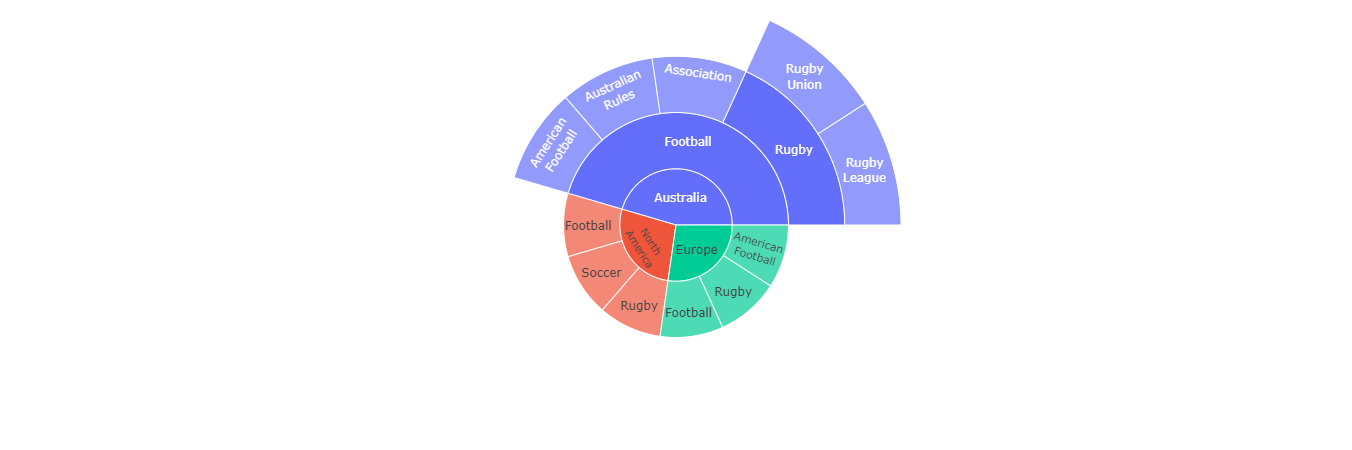

In [46]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
 ids=[
    "North America", "Europe", "Australia", "North America - Football", "Soccer",
    "North America - Rugby", "Europe - Football", "Rugby",
    "Europe - American Football","Australia - Football", "Association",
    "Australian Rules", "Autstralia - American Football", "Australia - Rugby",
    "Rugby League", "Rugby Union"
  ],
  labels= [
    "North<br>America", "Europe", "Australia", "Football", "Soccer", "Rugby",
    "Football", "Rugby", "American<br>Football", "Football", "Association",
    "Australian<br>Rules", "American<br>Football", "Rugby", "Rugby<br>League",
    "Rugby<br>Union"
  ],
  parents=[
    "", "", "", "North America", "North America", "North America", "Europe",
    "Europe", "Europe","Australia", "Australia - Football", "Australia - Football",
    "Australia - Football", "Australia - Football", "Australia - Rugby",
    "Australia - Rugby"
  ],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

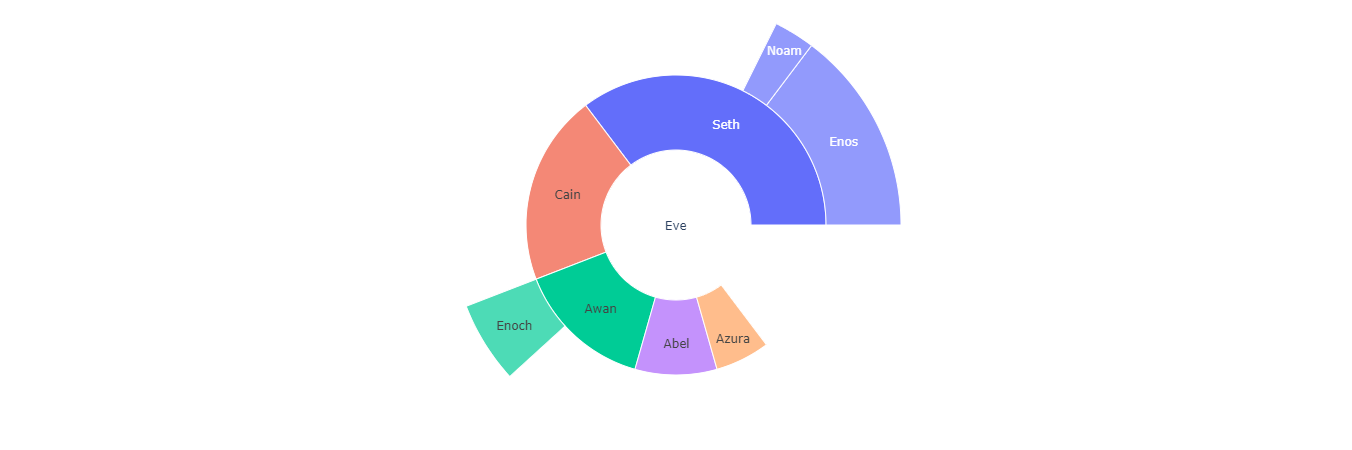

In [42]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()